<a href="https://colab.research.google.com/github/QFrankQ/Applied-Numerical-Optimization/blob/main/Total_variation_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Total Variation Denoising**#
In this programming assignment, we will implement the 1-D total variation denoising algorithm.  \\ 
Recall what we have discussed in class. The original (1-D) total variation denoising problem is
\begin{align*}
\underset{\mathbf{x}}{\text{minimize}} \quad \quad  \frac{1}{2}\| \mathbf{x} - \mathbf{y}\|_2^2 + \lambda | \nabla \mathbf{x} |,
\end{align*} 
where $| \nabla \mathbf{x} | = \sum_{i=1}^{N-1} |x_{i+1} - x_i|$, for $\mathbf{x}, \mathbf{y} \in \mathbb{R}^N$ ($\mathbf{y}$ is the noisy signal). Its dual problem is given by
\begin{align*}
\underset{\boldsymbol{\gamma} \in \mathbb{R}^{N-1}}{\text{minimize}}  \quad \quad & \frac{1}{2}\| \mathbf{y} - \mathbf{D}^T \boldsymbol{\gamma}\|_2^2, \\
\text{subject to}  \quad \quad & \| \boldsymbol{\gamma}\|_\infty \leq \lambda.
\end{align*} 
where $\nabla \mathbf{x}= \mathbf{D}\mathbf{x}$. **Please check lecture 13 slides for more details.** \\
Then, the primal solution is given by $\mathbf{x}_* = \mathbf{y} - \mathbf{D}^T \boldsymbol{\gamma}_*$. So now we see that there are several key elements in here: i) Find quick ways to implement matrix products $\mathbf{D}$, $\mathbf{D}^T$, and $\mathbf{D}\mathbf{D}^T$. This will be very important as $N$ gets large; we can do this without explicitly building these matrices. ii)) Solve the dual problem above using proximal gradient (which we implemented before). \\

**Step 1**: Implement the matrix products $\mathbf{D}$, $\mathbf{D}^T$, and $\mathbf{D}\mathbf{D}^T$; you can pick any way that works as long as it's efficient. Write three functions that perform these total variation operations. They should have the following format:


In [1]:
import numpy as np
import math

def D(x):
    # x is the input vector with length N
    # compute res, an output vector with length N-1
    
    return np.array([x[i] - x[i-1] for i in range(1, x.shape[0])])
  
def DT(y):
    # y is the input vector with length N-1
    # compute res, an output vector with length N
    return np.array([-y[i] if i == 0 else y[i-1] if i== y.shape[0] else y[i-1] - y[i] for i in range(y.shape[0]+1)])
  
def DDT(x):
    # x is the input vector with length N-1
    # compute res, an output vector with length N-1
    
    return np.array([2*x[i] - x[i+1] if i ==0 else 2*x[i] - x[i-1] if i == x.shape[0] -1 else -x[i-1] + 2*x[i] - x[i+1] for i in range(x.shape[0])])

*Answer the questions and discuss your findings here*


**Step 2:** You already have the proximal gradient algorithm (from PA4, using constant stepsizes). Implement the objective function, the gradient, and the proximal mapping using the Python *lambda* tool (they should be pretty easy). The overall algorithm is simply a proximal gradient part to solve the dual problem plus the final step of converting the dual solution to the primal solution. 


In [2]:
"""
  Add your code here
"""

f = lambda gamma, y: 1/2 *pow(np.linalg.norm(y - DT(gamma)), 2)
fp = lambda gamma, y: DDT(gamma) - D(y)
prox = lambda gamma, z, lam: np.array([(gamma_i / abs(gamma_i))* lam if abs(gamma_i) > lam else gamma_i for gamma_i in z])
to_x = lambda gamma, y: y - DT(gamma) 

# gamma = [0, 1, 2, 4, -3, -6, -4, 3, -7, 10]
# lam = 4


*Answer the questions and discuss your findings here*


**Step 3**: Generate data. Set *numpy*'s random seed to 0. Then, set $N_\text{blocks}=10$ and *block length* to $100$. This means that we are looking at a signal with 10 blocks and each block has length 100. The observation vector $\mathbf{y}$ is constructed by stacking all these blocks together into a $1000$-dimensional vector. 
Now, generate each block by doing the following. First, generate a base (noiseless) signal for the entire block from $\mathcal{N}(0,1)$. The signal is constant on this block. Then, for each of the 100 entries in this block, generate a perturbation from $\mathcal{N}(0,0.01)$ and add it to the original signal. In other words, we are generating a piecewise constant signal with a small additive noise. \\


In [3]:
"""
  Add your code here
"""
np.random.seed(0)

N_blocks = 10
block_length = 100
y = np.array([])
for i in range(N_blocks):
  sig = np.random.normal(0, 1)
  block = [sig for i in range(100)]
  #print(block[:10])
  block = block + np.random.normal(0, 0.01, 100)
  #print(block[:10])
  y = np.hstack((y, block))
#print(y.shape)




*Answer the questions and discuss your findings here*


**Step 4**: Run your code. The algorithm parameters (*maxit* and *tol*) should be the same as that in PA1.
1) What is the constant stepsize that you will use? In this case, you can get a (loose) bound of the Lipschitz constant without having to build the matrices explicitly. \\

In [4]:
"""
  Add your code here
"""

maxit = 10000
tol = 1e-15




*Answer the questions and discuss your findings here*
The loose bound would be 4 as it magnifies the vector no more than 4 times

**4.2**) For different values of $\lambda \in \{0, 0.1, 1, 10, 100 \}$, plot the original signal and the denoised signal.  Summarize the trend and discuss why that is the case. \\

<function matplotlib.pyplot.show(*args, **kw)>

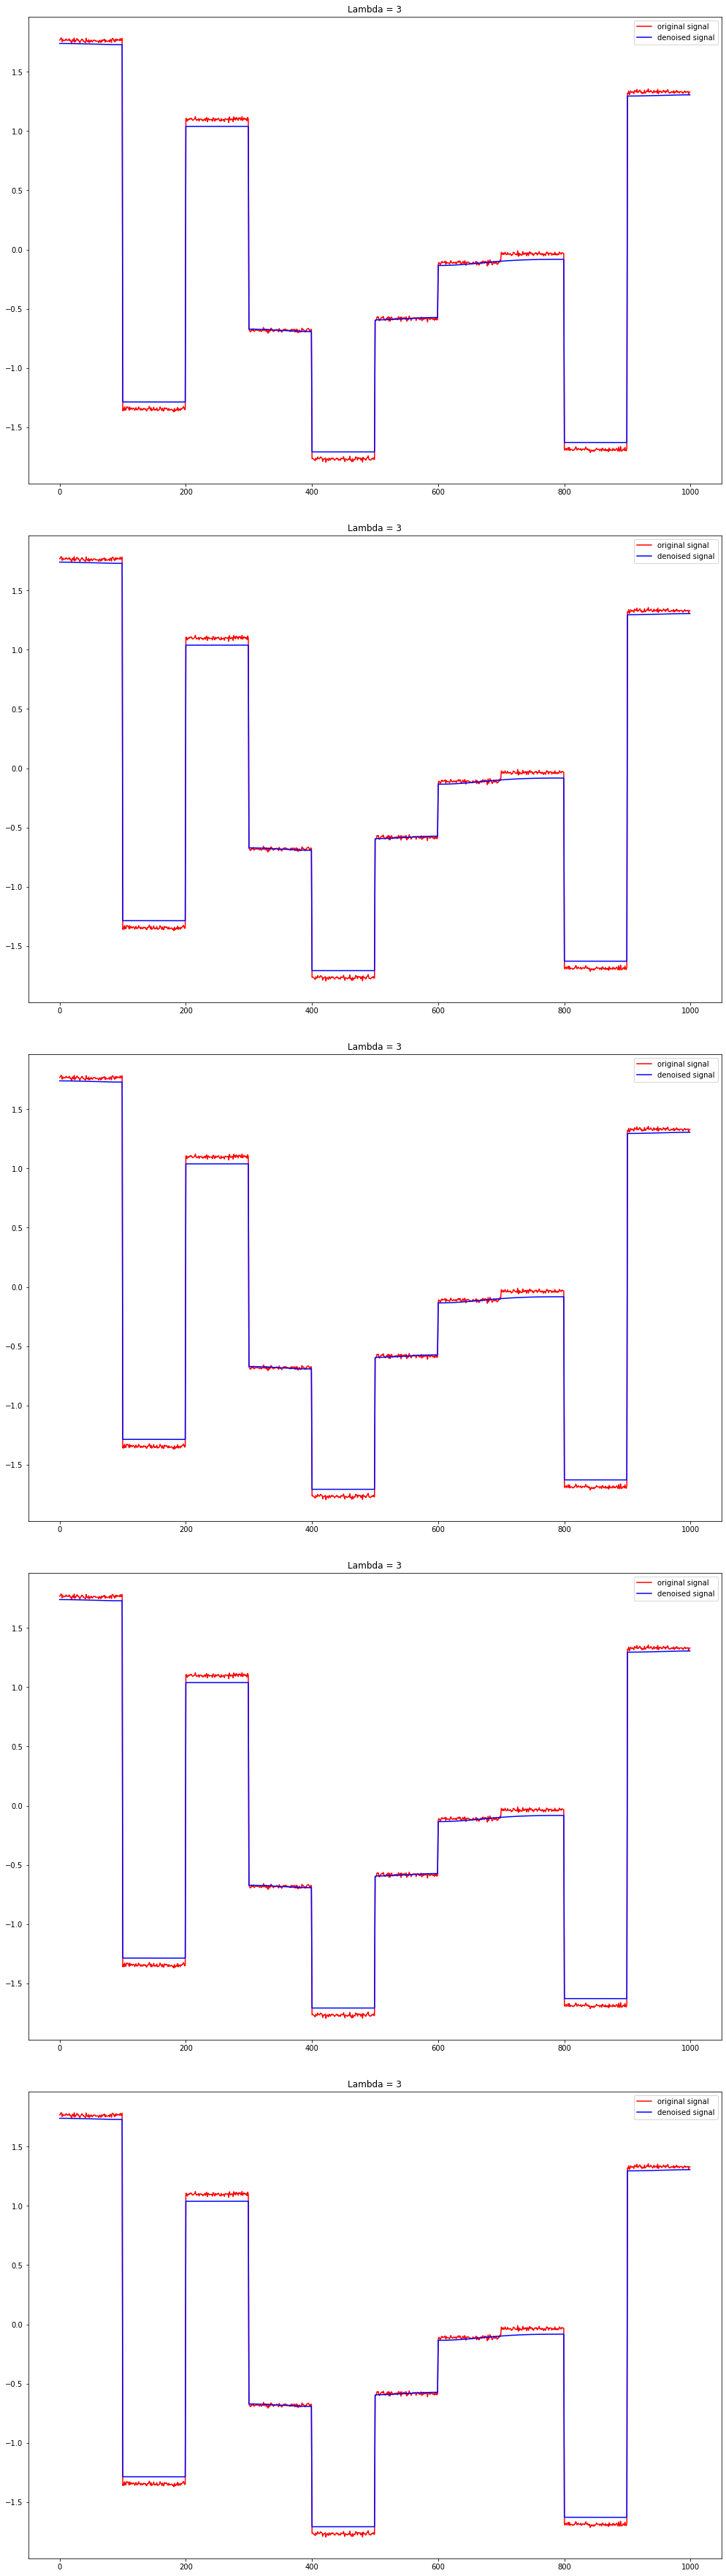

In [6]:
"""
  Add your code here
"""
import matplotlib.pyplot as plt
lams = [0, 0.1, 1, 10, 100]
fig, axs = plt.subplots(5, figsize = (15, 50))
fig.tight_layout(pad = 5.0)
i = 0
for lam in lams:
  it = 0
  change = math.inf
  ss = 1/4
  lam = 3
  gamma = np.zeros(N_blocks * block_length -1)
  while maxit > it and change > tol:
    z = gamma - ss * fp(gamma, y)
    new_gamma = prox(gamma, z, lam)
    change = abs(f(new_gamma, y) - f(gamma, y))/ abs(f(gamma, y))

    gamma = new_gamma
    it += 1
  #print(it)
  axs[i].plot(y, 'r', label = 'original signal')
  axs[i].plot(to_x(gamma, y), 'b', label = 'denoised signal')
  #axs[i].plot(to_x(gamma, y) - y , 'g', label = 'difference')
  #print((to_x(gamma, y) - y)[:10])
  axs[i].set_title(f'Lambda = {lam}')
  leg = axs[i].legend(loc='upper right')
  i += 1
plt.show


*Answer the questions and discuss your findings here*

The denoised signal is almost the same as the original signal when lambda is 0, and as lambda gets larger the denoised signal gets more and more inaccurate. This happens because lambda indicates how much the denoised signal can deviate from the original signal, as lambda approach 0, gamma also approaches 0, the term DT * gamma also approaches 0, making x* closer to y


#Add Colab link here: # https://colab.research.google.com/drive/1r6n6aAFBs9rUuj8pGe2I1MJz3iIYhwLj?authuser=1#scrollTo=AZjG-RWk5BGd